In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [5]:
iris=load_iris()
print(type(iris))
print('Data shape',iris.data.shape)
print('Lable',iris.target.shape)
print(iris)

<class 'sklearn.utils._bunch.Bunch'>
Data shape (150, 4)
Lable (150,)
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5,

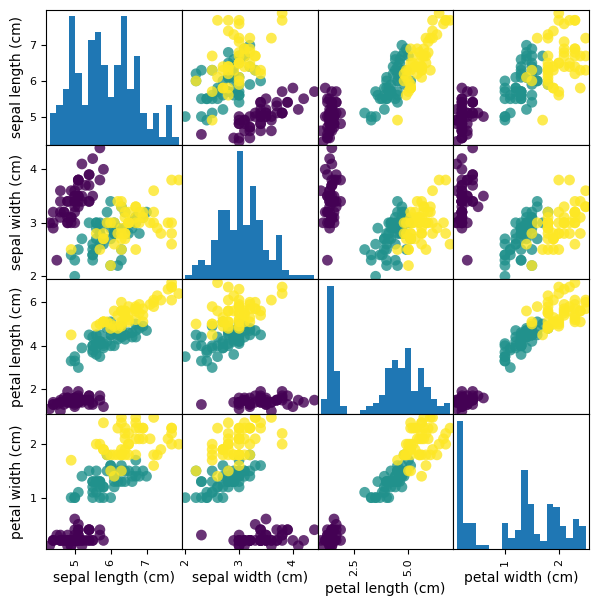

In [7]:
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c= iris.target,
                           figsize=(7,7), marker='o',
                           hist_kwds={'bins':20},s=60,alpha=0.8)
plt.show()

In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [32]:
x = iris.data
y= iris.target.reshape(-1,1) #reshape(인자1,인자2) 인자1과 인자2를 곱해서 데이터수 만큼 묶어줌
y.shape

(150, 1)

In [33]:
encoder = OneHotEncoder(sparse=False)   #sparse는 희소행렬 default = True
encoded_y = encoder.fit_transform(y)
print(encoded_y.shape)
print(encoded_y[45:55])

(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [111]:
x_train, x_test,y_train,y_test=train_test_split(x,encoded_y,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


In [112]:
model = Sequential()
model.add(Dense(128,input_dim=4,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))#다중출력이기 때문에 softmax
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               640       
                                                                 
 dense_51 (Dense)            (None, 256)               33024     
                                                                 
 dense_52 (Dense)            (None, 512)               131584    
                                                                 
 dense_53 (Dense)            (None, 256)               131328    
                                                                 
 dense_54 (Dense)            (None, 128)               32896     
                                                                 
 dense_55 (Dense)            (None, 3)                 387       
                                                                 
Total params: 329859 (1.26 MB)
Trainable params: 3298

In [113]:
opt = Adam(lr=0.001)
model.compile(opt,loss='categorical_crossentropy',
              metrics=['accuracy'])
fit_hist=model.fit(x_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
3/3 [==============================] - 2s 11ms/step - loss: 1.0521 - accuracy: 0.3417
Epoch 2/20
3/3 [==============================] - 0s 11ms/step - loss: 0.7504 - accuracy: 0.8667
Epoch 3/20
3/3 [==============================] - 0s 9ms/step - loss: 0.5435 - accuracy: 0.8333
Epoch 4/20
3/3 [==============================] - 0s 10ms/step - loss: 0.4273 - accuracy: 0.7167
Epoch 5/20
3/3 [==============================] - 0s 11ms/step - loss: 0.3488 - accuracy: 0.8500
Epoch 6/20
3/3 [==============================] - 0s 10ms/step - loss: 0.2539 - accuracy: 0.9417
Epoch 7/20
3/3 [==============================] - 0s 10ms/step - loss: 0.2007 - accuracy: 0.9417
Epoch 8/20
3/3 [==============================] - 0s 10ms/step - loss: 0.1763 - accuracy: 0.9333
Epoch 9/20
3/3 [==============================] - 0s 10ms/step - loss: 0.1433 - accuracy: 0.9667
Epoch 10/20
3/3 [==============================] - 0s 10ms/step - loss: 0.1365 - accuracy: 0.9333
Epoch 11/20
3/3 [=============

In [114]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Final test set accuracy',score[1])

Final test set accuracy 0.9666666388511658


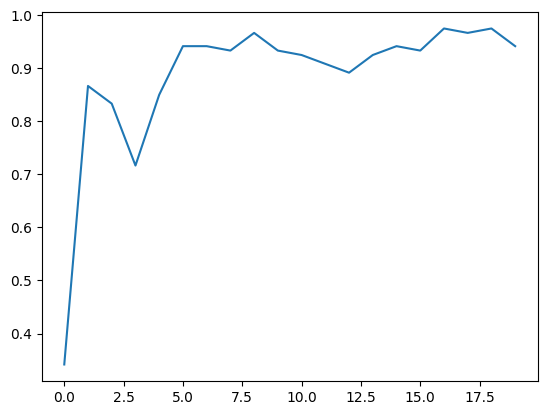

In [115]:
plt.plot(fit_hist.history['accuracy'])

In [116]:
labels=iris.target_names
labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [117]:
my_sample = np.random.randint(30)
sample = x_test[my_sample]
print('sample data',sample)
sample = sample.reshape(1,4)
print('reshape data',sample)
pred=model.predict(sample)
print('pred is :',pred)
print('actual is :',y_test[my_sample])
print('Target :',labels[np.argmax(y_test[my_sample])])
print('Prediction after learning is :',labels[np.argmax(pred)])

sample data [5.1 3.7 1.5 0.4]
reshape data [[5.1 3.7 1.5 0.4]]
1/1 [==============================] - 0s 84ms/step
pred is : [[9.99889970e-01 1.09963345e-04 6.60190957e-10]]
actual is : [1. 0. 0.]
Target : setosa
Prediction after learning is : setosa
